Min Longitude: -179.99994
Max Longitude: 179.99916
Min Latitude: -89.94689
Max Latitude: 89.95302
lats from natural earth:  -25.730654779726077 lons from natural earth:  134.50277547536595


C:\Users\User\AppData\Local\Temp\ipykernel_9716\2415880664.py:37: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\User\AppData\Local\Temp\ipykernel_9716\2415880664.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lats = australia.geometry.centroid.y.iloc[0]
C:\Users\User\AppData\Local\Temp\ipykernel_9716\2415880664.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lons = australia.geometry.centroid.x.iloc[0]
C:\Users\User\AppData\Local\Temp\ipykernel_9716\

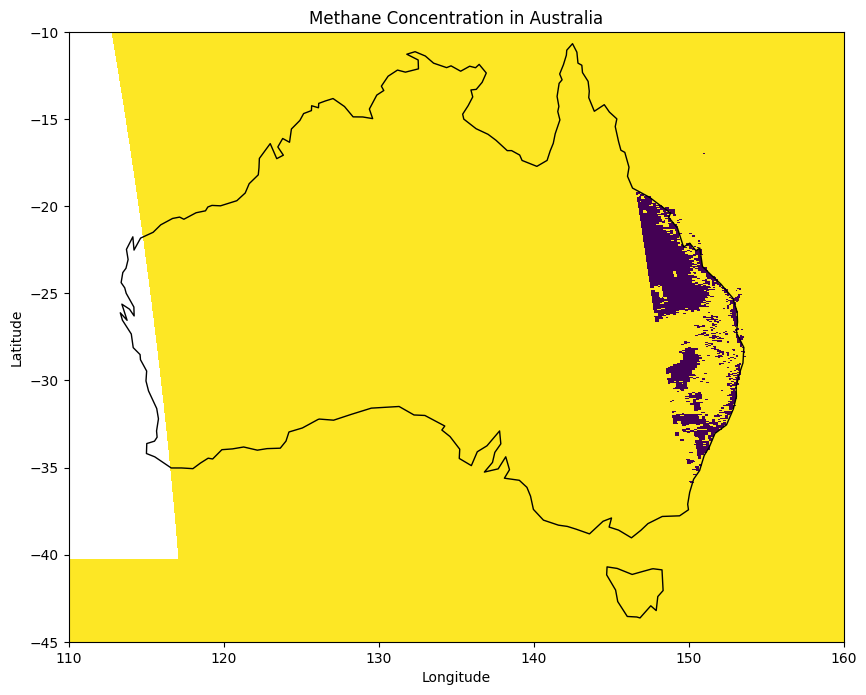

In [6]:
import netCDF4 as nc4
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


Dataset1 = nc4.Dataset(r"C:\Users\User\Downloads\S5P_OFFL_L2__CH4____20230827T023206_20230827T041335_30414_03_020500_20230828T181758.nc")
Dataset2=  nc4.Dataset(r"C:\Users\User\Downloads\S5P_OFFL_L2__CH4____20230826T043244_20230826T061414_30401_03_020500_20230827T203114.nc")

#print(Dataset1)

lons1 = Dataset1.groups['PRODUCT'].variables['longitude'][:][0, :, :]
lats1 = Dataset1.groups['PRODUCT'].variables['latitude'][:][0, :, :]
methane1 = Dataset1.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'][0, :, :]

#print(lons1)

lons2 = Dataset2.groups['PRODUCT'].variables['longitude'][:][0, :, :]
lats2 = Dataset2.groups['PRODUCT'].variables['latitude'][:][0, :, :]
methane2 = Dataset2.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'][0, :, :]

#print(lons2)

# Concatenate latitude, longitude, and methane data

lons_combined = np.concatenate((lons1, lons2), axis=1)  
lats_combined = np.concatenate((lats1, lats2), axis=1)  
methane_combined = np.concatenate((methane1, methane2), axis=1)

print("Min Longitude:", np.min(lons_combined))
print("Max Longitude:", np.max(lons_combined))
print("Min Latitude:", np.min(lats_combined))
print("Max Latitude:", np.max(lats_combined))


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['name'] == 'Australia']

# Extract the lats and lons for the country
lats = australia.geometry.centroid.y.iloc[0]
lons = australia.geometry.centroid.x.iloc[0]

print("lats from natural earth: ", lats , "lons from natural earth: " ,lons)



fig, ax = plt.subplots(figsize=(10, 10))
australia.boundary.plot(ax=ax, linewidth=1, color='black')



# Plot the methane data on the map of Australia
mesh = ax.pcolormesh(lons_combined, lats_combined, methane_combined, cmap='viridis', shading='auto')
#cbar = plt.colorbar(mesh, ax=ax, label=ch4_units)



ax.set_title('Methane Concentration in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([110, 160])
ax.set_ylim([-45, -10])

plt.show()